<a href="https://colab.research.google.com/github/veera-learn/TravelHaven-room-boooking/blob/main/Googleplaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv("/content/googleplaystore.csv")

print(df.head())
print(df.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [3]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [6]:
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]','',regex = True)
df['installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')

In [10]:
import numpy as np


df['Size'] = df['Size'].replace('Varies with device',np.nan)

df['Size'] = df['Size'].astype(str).str.lower().str.strip()

def convert_size(size):
  try:
    if 'm' is size:
      return float(size.replace('m','')) * 1_000_000
    elif 'k' in size:
      return float(size.replace({'k',''}))* 1_000
    else:
      return np.nan
  except:
    return np.nan
df['Size'] = df['Size'].apply(convert_size)

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipython-input-10-1983457776.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if 'm' is size:


In [14]:
df['Price'] = df['Price'].astype(str).str.replace("$",'')
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

In [16]:
de = df.dropna(subset=['Rating','Size','Installs','Price'])

In [18]:
df.to_csv("playstore_scleaned.csv", index = False)

In [ ]:
df.to_csv("googleplaystore_cleaned.csv", index=False)

<Axes: title={'center': 'Top 10 Categories by App Count'}, xlabel='Category'>

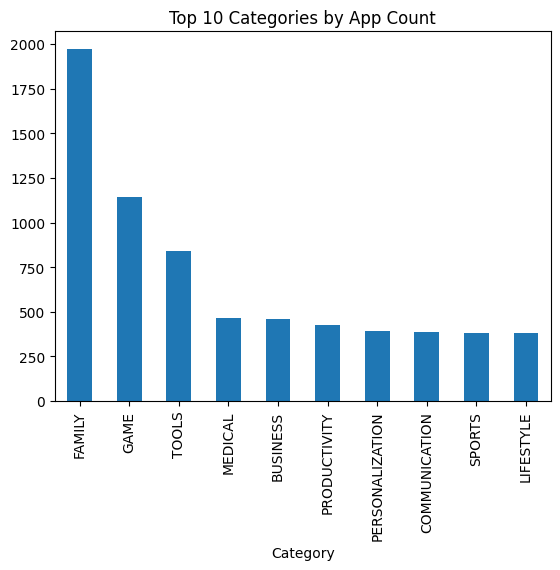

In [19]:
top_categories = df['Category'].value_counts().head(10)
top_categories.plot(kind = 'bar', title = 'Top 10 Categories by App Count')


In [22]:
top_installed = df[['App', 'Installs']].sort_values(by = 'Installs', ascending = False).head(10)
print(top_installed)

                                           App   Installs
10472  Life Made WI-Fi Touchscreen Photo Frame       Free
1655                          Candy Crush Saga  500000000
3870                                  Snapchat  500000000
1759                              Temple Run 2  500000000
3879                                       Pou  500000000
1966                          Candy Crush Saga  500000000
3888                            My Talking Tom  500000000
1751                          Candy Crush Saga  500000000
1729                              Temple Run 2  500000000
3907                          Google Translate  500000000


<Axes: title={'center': 'Free vs Paid Apps'}, ylabel='count'>

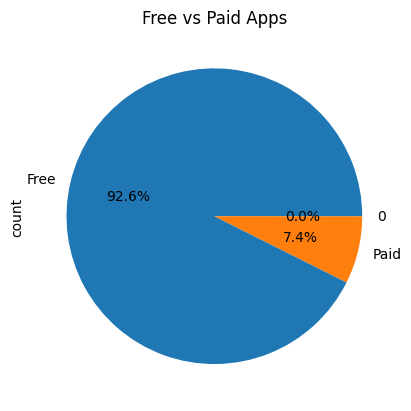

In [24]:
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Free vs Paid Apps')

<Axes: title={'center': 'Top 10 Categories by Avg Rating'}, ylabel='Category'>

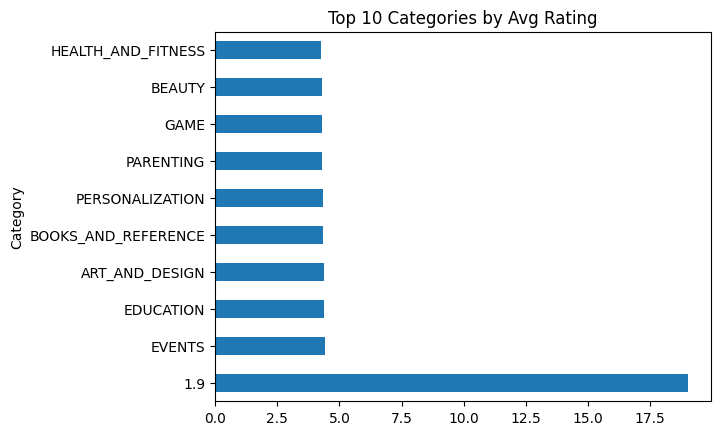

In [26]:
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending = False).head(10)
avg_rating.plot(kind = 'barh', title = 'Top 10 Categories by Avg Rating')

<Axes: title={'center': 'App Size vs Rating'}, xlabel='Size', ylabel='Rating'>

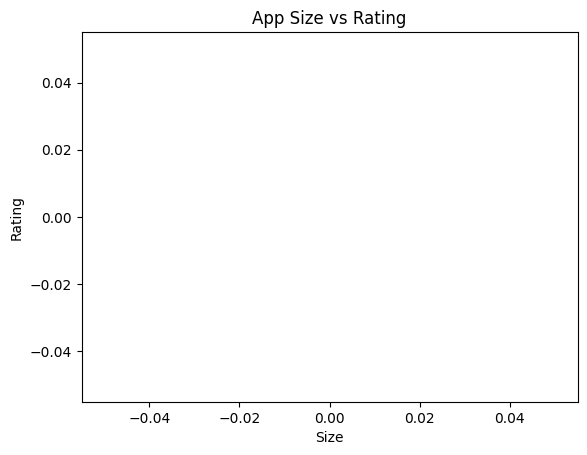

In [27]:
df[['Size','Rating']].plot(kind='scatter', x='Size', y='Rating', title = 'App Size vs Rating')

<Axes: title={'center': 'Price Diustribution f paid Apps'}, ylabel='Frequency'>

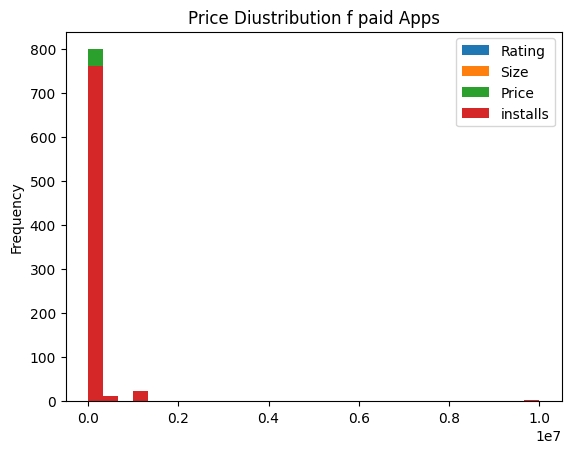

In [28]:
df[df['Type']=='Paid'].plot(kind='hist', bins= 30, title='Price Diustribution f paid Apps')